IMPORTING THE DATASET 3 : Bollywood Top Movies

In [42]:
import pandas as pd 
file = "4KMovies.csv"
movies_df = pd.read_csv(file)
movies_df.head(25)

,Title,id,Date of Release,Genres,cast,crew,Summary,Keywords,Ratings,Votes,Reviews
0,3 Idiots,1187043,25-Dec-09,"Comedy, Drama","Aamir Khan, Madhavan, Sharman Joshi, Kareena K...",Rajkumar Hirani,Farhan Qureshi and Raju Rastogi want to re-uni...,"papadum, hairy-chest, against-the-system, comi...",8.4,386870.0,"\n\nIt\s hard for me to review this film, as I..."
1,Like Stars on Earth,986264,21-Dec-07,"Drama, Family","Darsheel Safary, Aamir Khan, Tisca Chopra, Vip...","Amole Gupte, Ratn Anoop",Ishaan Awasthi is an eight-year-old child whos...,"teacher-student-relationship, dyslexia, agains...",8.3,188891.0,\n\nAs I just became aware of this film a few ...
2,PK,2338151,19-Dec-14,"Comedy, Drama, Sci-Fi","Aamir Khan, Rajinder Sharma Nanu, Anushka Shar...","Rajkumar Hirani, Sivapranav Panicker",P. K. is a comedy of ideas about a stranger in...,"guru, religion, tv-reporter, alien-on-earth, p...",8.1,180051.0,"\n\nTo make this short and quick, PK is a movi..."
3,Dangal,5074352,23-Dec-16,"Action, Biography, Drama, Sport","Aamir Khan, Fatima Sana Shaikh, Sanya Malhotra...","Piyush Gupta, Pranjal Singh","Biopic of Mahavir Singh Phogat, who taught wre...","small-town, father-daughter-relationship, male...",8.3,183365.0,"\n\nIf I would Ive seen this movie in 2016, it..."
4,Color It Yellow,405508,26-Jan-06,"Comedy, Crime, Drama","Aamir Khan, Siddharth, Sharman Joshi, Kunal Ka...",Renzil DSilva,Sue comes to India to make a film on Indian re...,"delhi-india, murder, friend, india, awakening",8.1,118214.0,\n\nPaint It Yellow\x85. Oops\x85.that\s suppo...
5,Lagaan: Once Upon a Time in India,169102,15-Jun-01,"Drama, Musical, Sport","Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",Ashutosh Gowariker,This is the story about the resilience shown b...,"cricket-the-sport, indian-freedom-movement, la...",8.1,112231.0,"\n\nIn 1893, India was a colony of England. Th..."
6,My Name Is Khan,1188996,12-Feb-10,"Drama, Romance","Shah Rukh Khan, Kajol, Katie Amanda Keane, Ken...","Shibani Bathija, Yuvraj Singh Dodia","Rizwan Khan, a Muslim from the Borivali sectio...","barack-obama-character, aspergers-syndrome, ra...",7.9,105477.0,\n\nI saw this with my family in a theatre. Su...
7,Swades,367110,17-Dec-04,"Drama, Musical","Shah Rukh Khan, Gayatri Joshi, Kishori Ballal,...",M.G. Sathya,"Set in modern day India, Swades is a film that...","timeframe-2000s, bollywood-musical, india, vil...",8.1,89223.0,"\n\nAshutosh Gowariker, has really made this m..."
8,Gangs of Wasseypur,1954470,22-Jun-12,"Action, Comedy, Crime, Drama, Thriller","Manoj Bajpayee, Richa Chadha, Nawazuddin Siddi...",Akhilesh Jaiswal,Shahid Khan is exiled after impersonating the ...,"revenge, blood, gun, abuse, gangster",8.2,93885.0,\n\nIt has been nearly 5 years since I went an...
9,Gangs of Wasseypur,1954470,22-Jun-12,"Action, Comedy, Crime, Drama, Thriller","Manoj Bajpayee, Richa Chadha, Nawazuddin Siddi...",Akhilesh Jaiswal,Shahid Khan is exiled after impersonating the ...,"revenge, blood, gun, abuse, gangster",8.2,93885.0,\n\nIt has been nearly 5 years since I went an...


CLEANING THE NON INTEGER VALUES IN DATASET

In [43]:
# Check for missing values
missing_values = movies_df.isna().sum()
missing_values


Title                0
id                   0
Date of Release    836
Genres              16
cast                22
crew               619
Summary            524
Keywords           880
Ratings             71
Votes               71
Reviews            738
dtype: int64

In [44]:
# Fill missing numerical values with the mean
movies_df['Ratings'] = movies_df['Ratings'].fillna(movies_df['Ratings'].mean())
movies_df['Votes'] = movies_df['Votes'].fillna(movies_df['Votes'].mean())
movies_df['Genres'] = movies_df['Genres'].fillna(movies_df['Genres'].mode()[0])


ANALYSIS OF THE DATASET

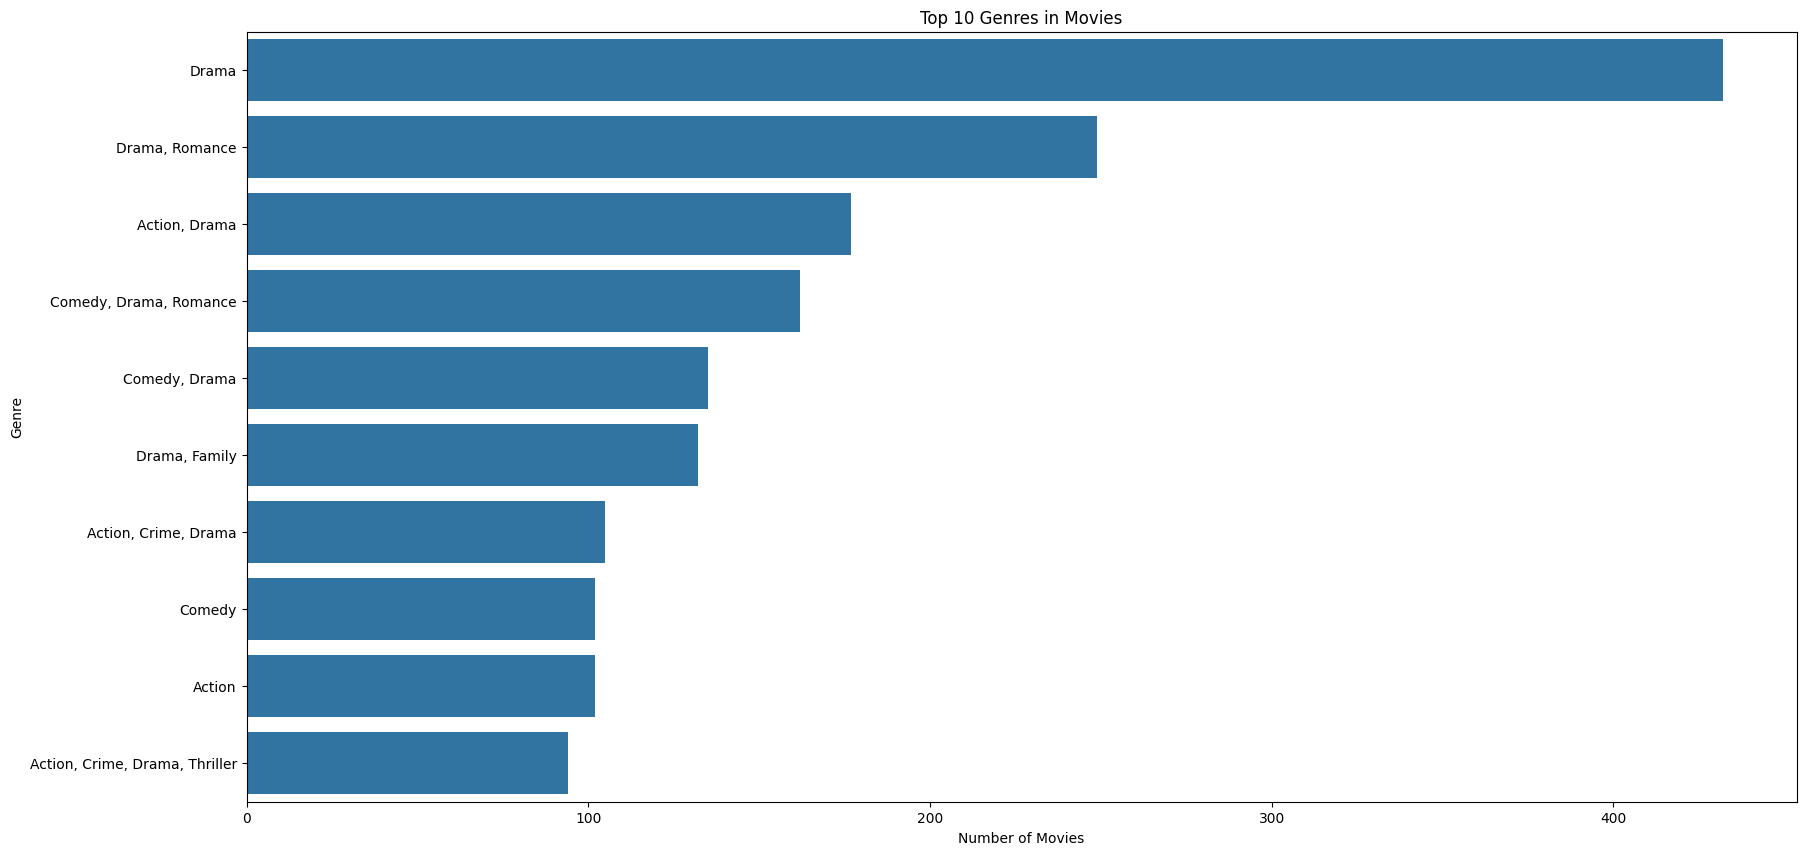

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(20, 10))

# Draw a bar plot for the top 10 genres
genre_counts = movies_df['Genres'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Genres in Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


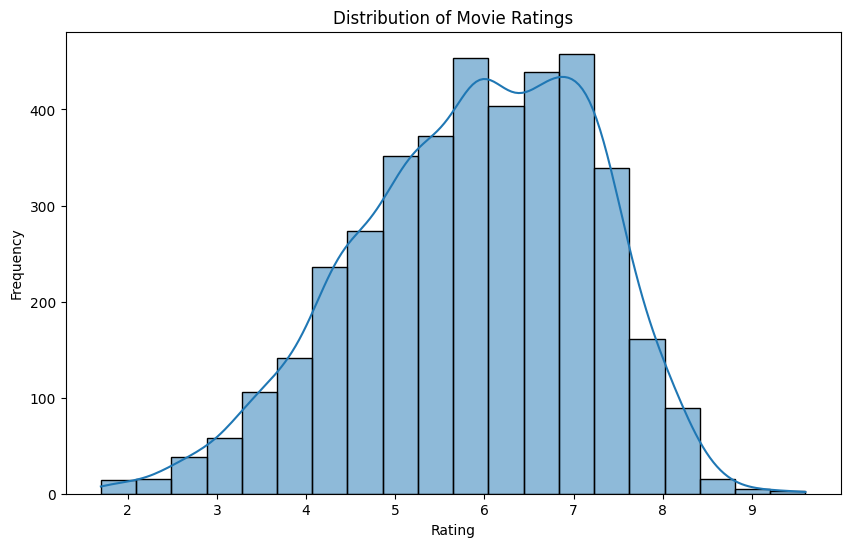

In [46]:
# Draw a histogram for movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Ratings'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

1.PREDICTING THE IMDB RATING USING CAST CREW AND GENRE

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [49]:
# Assuming the dataset has columns: 'cast', 'crew', 'genres', 'rating'
# Preprocess the data
label_encoders = {}
for column in ['cast', 'crew', 'Genres']:
    label_encoders[column] = LabelEncoder()
    movies_df[column] = label_encoders[column].fit_transform(movies_df[column].astype(str))


In [50]:
# Split the data
X = movies_df[['cast', 'crew', 'Genres']]
y = movies_df['Ratings']


In [51]:
# Handle missing values in y
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Build the pipeline for preprocessing and model
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['cast', 'crew', 'Genres'])
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])


In [54]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cast', 'crew',
                                                   'Genres'])])),
                ('regressor', LinearRegression())])

In [55]:
# Predict and calculate accuracy
y_pred = model.predict(X_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 78.65%


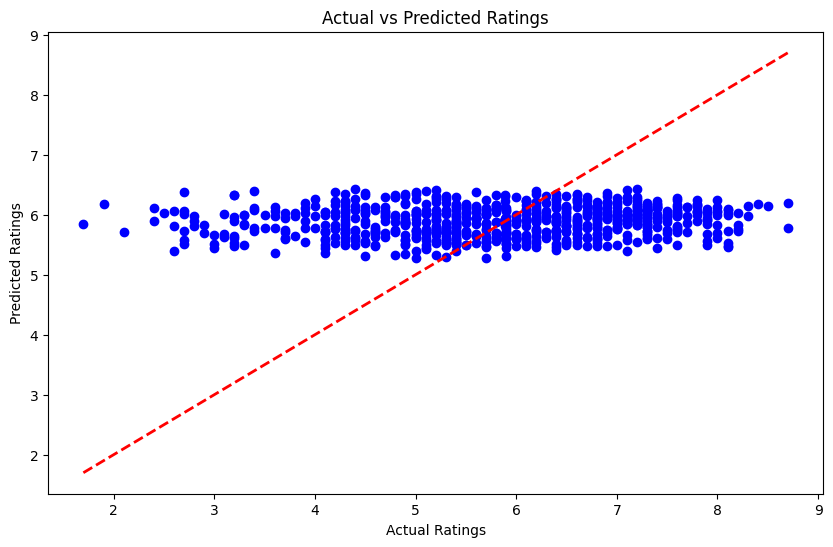

In [56]:
_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

2.SUGGESTING USER THE NEAREST MOVIES TO HIS TASTE USING KNN

In [57]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
file = "4KMovies.csv"
movies_df = pd.read_csv(file)


In [58]:
# Clean up missing values in 'Genres' column
movies_df['Genres'] = movies_df['Genres'].fillna('')  # fill NaN values with empty string

# Prepare the data for KNN
movies_df['Genres_List'] = movies_df['Genres'].apply(lambda x: x.split(','))

# Extract unique genres
genre_list = list(set([item.strip() for sublist in movies_df['Genres_List'] for item in sublist]))

# Create binary columns for each genre
for genre in genre_list:
    movies_df[genre] = movies_df['Genres_List'].apply(lambda x: 1 if genre in x else 0)

# Features for KNN model
knn_features = ['Ratings'] + genre_list

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
knn_data = movies_df[knn_features]
knn_data = pd.DataFrame(imputer.fit_transform(knn_data), columns=knn_features)


In [59]:
# Build the KNN model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn_model.fit(knn_data)


NearestNeighbors()

In [60]:
# Example input for KNN (you can modify this for user input)
fav_genres = ['Comedy']  # example favorite genres
fav_movie = '3 Idiots'  # example favorite movie

# Find the index of the favorite movie
fav_movie_index = movies_df[movies_df['Title'] == fav_movie].index[0]

# Prepare data for the favorite movie
fav_movie_data = knn_data.loc[fav_movie_index].values.reshape(1, -1)

# Use the KNN model to find nearest neighbors
distances, indices = knn_model.kneighbors(fav_movie_data)
recommended_indices = indices.flatten()

# Get recommended movies
recommended_movies = movies_df.iloc[recommended_indices]['Title'].values

print(f"Recommended Movies: {recommended_movies}")


Recommended Movies: ['3 Idiots' 'Do Ankhen Barah Haath' 'Jaane Bhi Do Yaaro' 'Angoor'
 'Hanky Panky']


c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


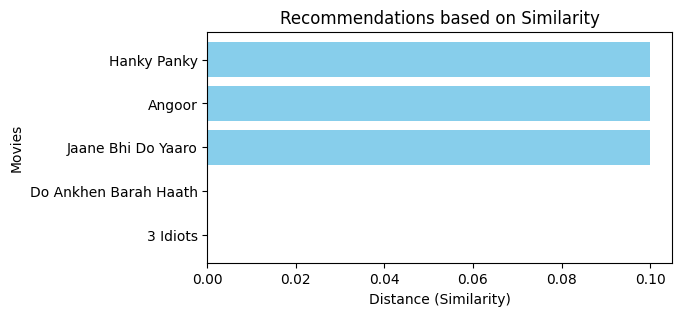

In [61]:
import matplotlib.pyplot as plt

# Example data for plotting
movies = recommended_movies
distances = distances.flatten()

# Plotting
plt.figure(figsize=(6 ,3))
plt.barh(movies[::-1], distances[::-1], color='skyblue')
plt.xlabel('Distance (Similarity)')
plt.ylabel('Movies')
plt.title('Recommendations based on Similarity')
plt.gca().invert_yaxis()  # Invert y-axis to show highest similarity at the top
plt.show()


In [62]:
fav_movie = input("Enter your favorite movie: ")
fav_genres = input("Enter your favorite genres (comma-separated): ").strip().split(',')

# Example input for KNN
fav_movie_index = movies_df[movies_df['Title'] == fav_movie].index
if len(fav_movie_index) == 0:
    print(f"Sorry, '{fav_movie}' is not found in the movie list.")
    exit()

fav_movie_index = fav_movie_index[0]
fav_movie_data = knn_data.loc[fav_movie_index].values.reshape(1, -1)

# Find nearest neighbors
distances, indices = knn_model.kneighbors(fav_movie_data)
recommended_indices = indices.flatten()

# Format and print recommendations
recommended_movies = movies_df.iloc[recommended_indices]['Title'].values

print("\n--- Recommendations based on your preferences ---")
print(f"Favorite Movie: {fav_movie}")
print(f"Favorite Genres: {', '.join(fav_genres)}")
print("\nRecommended Movies:")
for i, movie in enumerate(recommended_movies, 1):
    print(f"{i}. {movie}")



--- Recommendations based on your preferences ---
Favorite Movie: Swades
Favorite Genres: Drama,  Musical

Recommended Movies:
1. Udaan
2. Swades
3. Lets Go! India
4. Black
5. Lagaan: Once Upon a Time in India


c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


3.PREDICTING THE NAME OF THE MOVIE WITH THE HELP OF HERO AND PLOT

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [65]:
# Load the dataset
file_path = '4kMovies.csv'
movies_df = pd.read_csv(file_path)

# Handle missing values in the 'cast' column
movies_df['cast'] = movies_df['cast'].fillna('')

# Extract the first name from the cast
movies_df['First Name'] = movies_df['cast'].apply(lambda x: x.split(',')[0].split()[0] if x else '')

# Vectorize the summary using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_summary = tfidf_vectorizer.fit_transform(movies_df['Summary'].fillna(''))

# One-hot encode the first name of the cast
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
first_name_encoded = onehot_encoder.fit_transform(movies_df[['First Name']])

# Combine the features
features = np.hstack((tfidf_summary.toarray(), first_name_encoded.toarray()))

# Define the target variable (movie title)
target = movies_df['Title']

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train an SVC model
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
                                                                                      precision    recall  f1-score   support

                                                                             #Yaaram       0.00      0.00      0.00         1
                                                                            100 Days       0.00      0.00      0.00         1
                                                            23rd March 1931: Shaheed       0.00      0.00      0.00         1
                                                                             27 Down       0.00      0.00      0.00         1
                                                                                  3G       0.00      0.00      0.00         1
                                                                            68 Pages       0.00      0.00      0.00         1
                                                                       7 Hours to Go       0.0

c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [67]:
# Function to predict movie title based on user input
def predict_movie(summary, first_name):
    # Vectorize the summary using the trained TF-IDF vectorizer
    summary_tfidf = tfidf_vectorizer.transform([summary])
    
    # One-hot encode the first name using the trained one-hot encoder
    first_name_encoded = onehot_encoder.transform([[first_name]])
    
    # Combine the features
    input_features = np.hstack((summary_tfidf.toarray(), first_name_encoded.toarray()))
    
    # Predict the movie title
    predicted_title = svc.predict(input_features)
    
    return predicted_title[0]

# Example usage
summary_input = input("Enter the movie summary: ")
first_name_input = input("Enter the first name of a cast member: ")
predicted_title = predict_movie(summary_input, first_name_input)
print(f'Predicted Movie Title: {predicted_title}')

Predicted Movie Title: Hum Dono


c:\Users\celln\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
